___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [906]:
df = pd.read_csv('HR_Dataset.csv')

In [885]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
def explain(attribute):
    features= {'satisfaction_level': "It is employee satisfaction point, which ranges from 0-1.",
    'last_evaluation': 'It is evaluated performance by the employer, which also ranges from 0-1.',
    'number_project': 'How many of projects assigned to an employee?',
    'average_montly_hours': 'How many hours in averega an employee worked in a month?',
    'time_spend_company': 'time_spent_company means employee experience. The number of years spent by an employee in the company.',
    'Work_accident': 'Whether an employee has had a work accident or not.',
    'left': 'Whether the employee has left the company or not.',
    'promotion_last_5years': 'Whether an employee has had a promotion in the last 5 years or not.',
    'Departments': 'Employees working department/division.',
    'salary': 'Salary level of the employee such as low, medium and high.'}
    return features[attribute]

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [887]:
df.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [888]:
df.shape

(14999, 10)

In [889]:
df.isnull().sum() 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [890]:
def feat_uniques(x):
    max = {}
    for i in x.columns:
        a = x[i].nunique()
        max[i] = a
    for w in sorted(max, key=max.get, reverse=True):
        print(f"{w} columns has {max[w]} unique values")

In [891]:
feat_uniques(df)

average_montly_hours columns has 215 unique values
satisfaction_level columns has 92 unique values
last_evaluation columns has 65 unique values
Departments  columns has 10 unique values
time_spend_company columns has 8 unique values
number_project columns has 6 unique values
salary columns has 3 unique values
Work_accident columns has 2 unique values
left columns has 2 unique values
promotion_last_5years columns has 2 unique values


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [49]:
explain('satisfaction_level')

'It is employee satisfaction point, which ranges from 0-1.'

In [50]:
explain('last_evaluation')

'It is evaluated performance by the employer, which also ranges from 0-1.'

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [28]:
df[df['left'] == 0].shape[0]

11428

In [29]:
df[df['left'] == 1].shape[0]

3571

In [36]:
df_left = df[(df.left == 1)]

In [53]:
df_left = df_left.drop('left',axis=1)

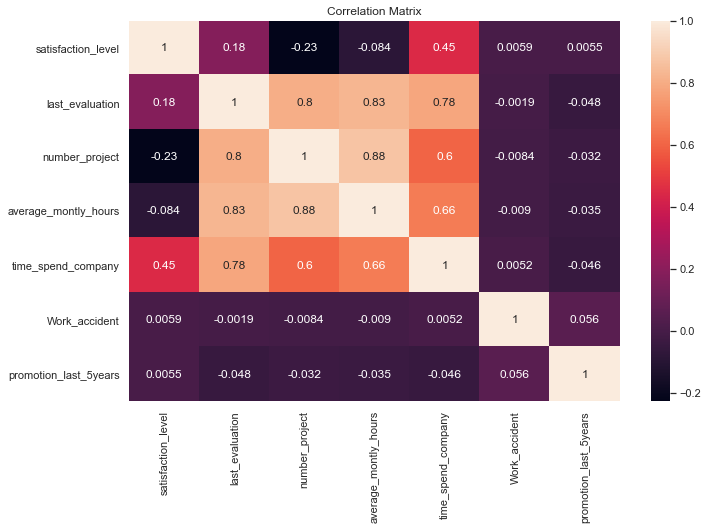

In [57]:
sns.set(rc={'figure.figsize':(11,7)})
plt.title('Correlation Matrix')
sns.heatmap(df_left.corr(),annot=True);

In [56]:
explain('time_spend_company')

'time_spent_company means employee experience. The number of years spent by an employee in the company.'

In [58]:
df_left[["satisfaction_level", 'last_evaluation']].mean()

satisfaction_level    0.440098
last_evaluation       0.718113
dtype: float64

In [67]:
df_emp = df[(df.left == 0)]

In [68]:
df_emp = df_emp.drop('left', axis=1)

In [69]:
df_emp.shape

(11428, 9)

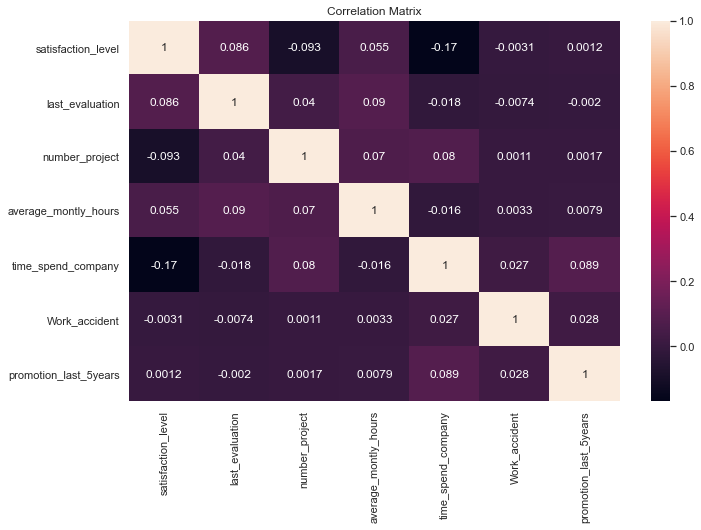

In [71]:
sns.set(rc={'figure.figsize':(11,7)})
plt.title('Correlation Matrix')
sns.heatmap(df_emp.corr(),annot=True);

In [73]:
df_emp[["satisfaction_level", 'last_evaluation']].mean()

satisfaction_level    0.666810
last_evaluation       0.715473
dtype: float64

In [85]:
df_left.groupby("satisfaction_level")["last_evaluation"].nunique().mean()

7.91358024691358

In [80]:
df_emp.groupby("satisfaction_level")["last_evaluation"].nunique().mean()

44.07865168539326

In [97]:
df.groupby("left").describe().T.rename(columns = {0:"Stayed", 1:"Left"})

left                               Stayed         Left
satisfaction_level    count  11428.000000  3571.000000
                      mean       0.666810     0.440098
                      std        0.217104     0.263933
                      min        0.120000     0.090000
                      25%        0.540000     0.130000
                      50%        0.690000     0.410000
                      75%        0.840000     0.730000
                      max        1.000000     0.920000
last_evaluation       count  11428.000000  3571.000000
                      mean       0.715473     0.718113
                      std        0.162005     0.197673
                      min        0.360000     0.450000
                      25%        0.580000     0.520000
                      50%        0.710000     0.790000
                      75%        0.850000     0.900000
                      max        1.000000     1.000000
number_project        count  11428.000000  3571.000000
                      mean       3.786664     3.855503
                      std        0.979884     1.818165
                      min        2.000000     2.000000
                      25%        3.000000     2.000000
                      50%        4.000000     4.000000
                      75%        4.000000     6.000000
                      max        6.000000     7.000000
average_montly_hours  count  11428.000000  3571.000000
                      mean     199.060203   207.419210
                      std       45.682731    61.202825
                      min       96.000000   126.000000
                      25%      162.000000   146.000000
                      50%      198.000000   224.000000
                      75%      238.000000   262.000000
                      max      287.000000   310.000000
time_spend_company    count  11428.000000  3571.000000
                      mean       3.380032     3.876505
                      std        1.562348     0.977698
                      min        2.000000     2.000000
                      25%        2.000000     3.000000
                      50%        3.000000     4.000000
                      75%        4.000000     5.000000
                      max       10.000000     6.000000
Work_accident         count  11428.000000  3571.000000
                      mean       0.175009     0.047326
                      std        0.379991     0.212364
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000
promotion_last_5years count  11428.000000  3571.000000
                      mean       0.026251     0.005321
                      std        0.159889     0.072759
                      min        0.000000     0.000000
                      25%        0.000000     0.000000
                      50%        0.000000     0.000000
                      75%        0.000000     0.000000
                      max        1.000000     1.000000

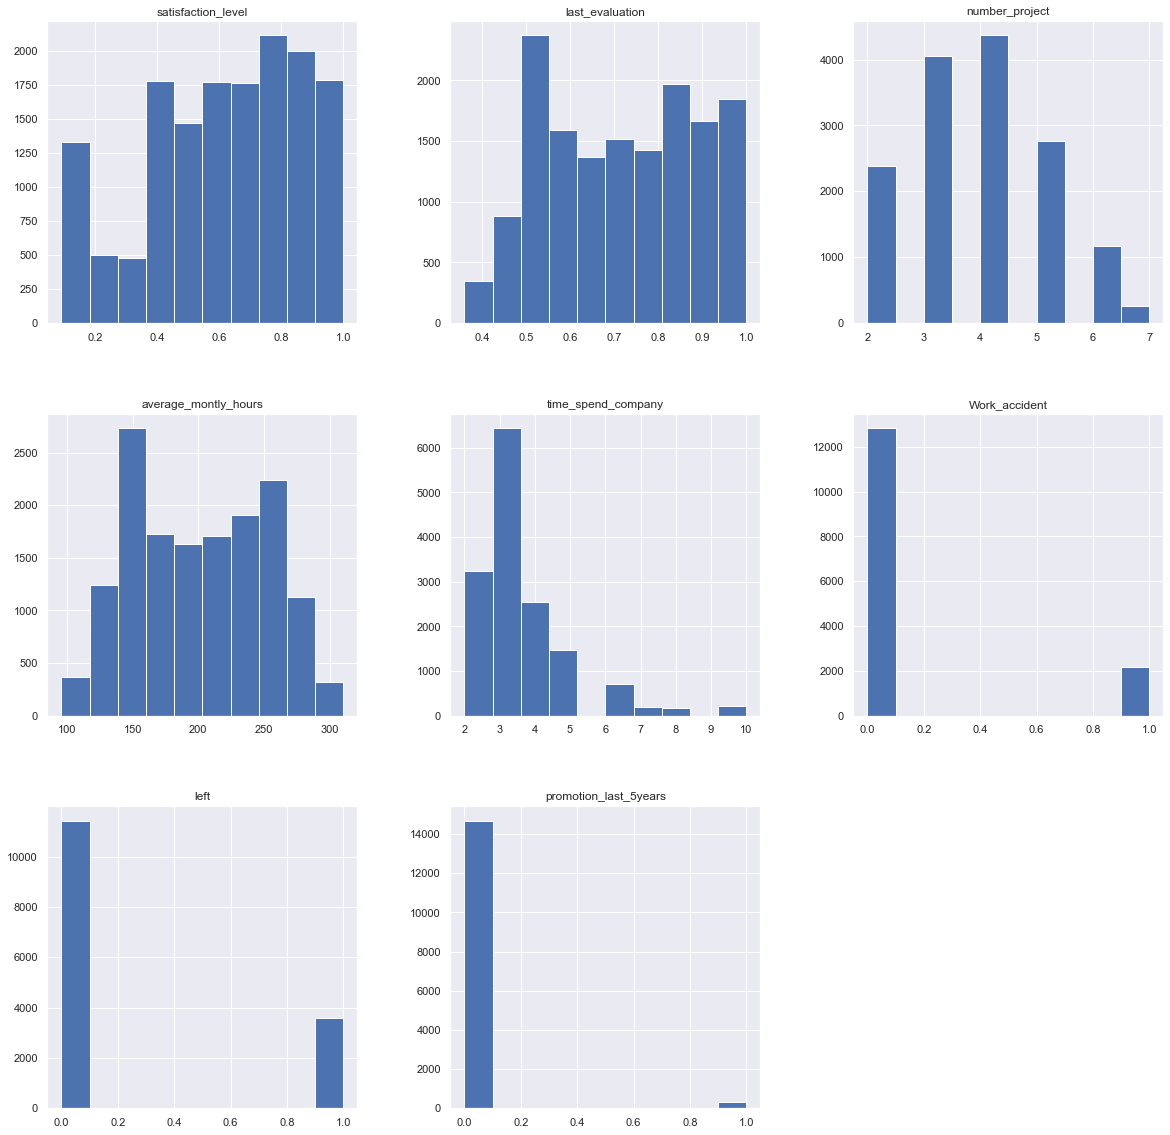

In [98]:
df.hist(figsize=(20,20))
plt.show()

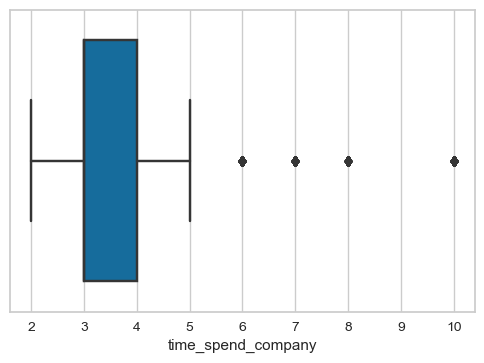

In [893]:
plt.figure(figsize=(6,4), dpi=100)
sns.boxplot(df.time_spend_company);

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [51]:
df_left.shape

(3571, 10)

In [100]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


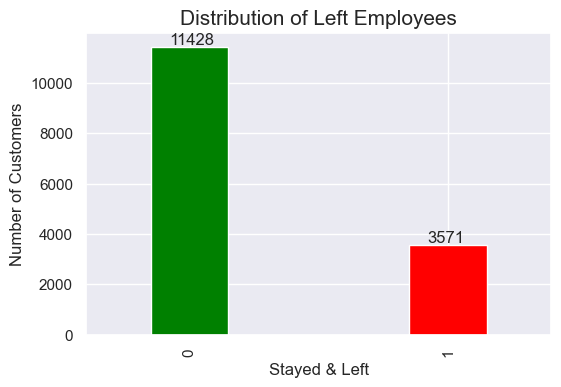

In [99]:
plt.figure(figsize=(6,4), dpi=100)
g = df.left.value_counts().plot(kind="bar", color=["green", "red"], width=0.3)
plt.title('Distribution of Left Employees', fontsize = 15)
plt.xlabel("Stayed & Left")
plt.ylabel("Number of Customers")

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.07, p.get_height()+100));

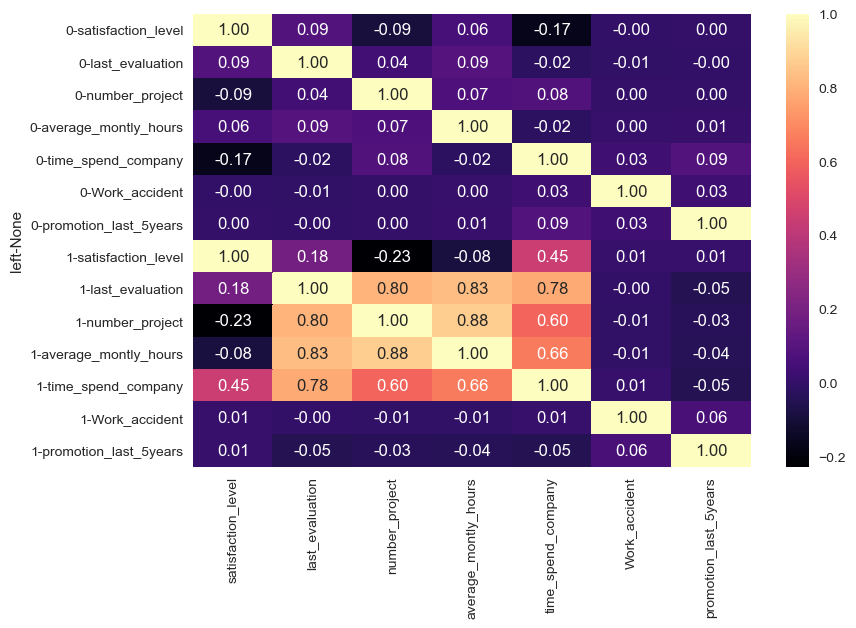

In [894]:
plt.figure(figsize=(9,6), dpi=100)
sns.heatmap(df.groupby("left").corr(), cmap='magma', annot=True, fmt=".2f");

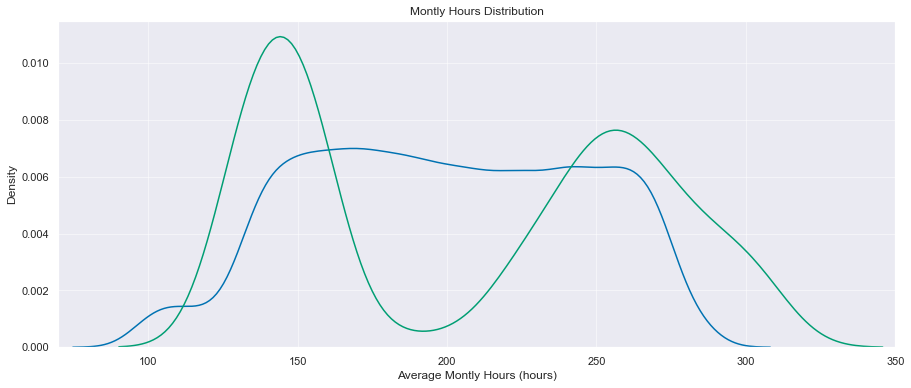

In [106]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['left'] == 0, 'average_montly_hours'], label = 'Active Employee')
sns.kdeplot(df.loc[df['left'] == 1, 'average_montly_hours'], label = 'Ex-Employees')
plt.xlim(left=70, right=350)
plt.xlabel('Average Montly Hours (hours)')
plt.ylabel('Density')
plt.title('Montly Hours Distribution');

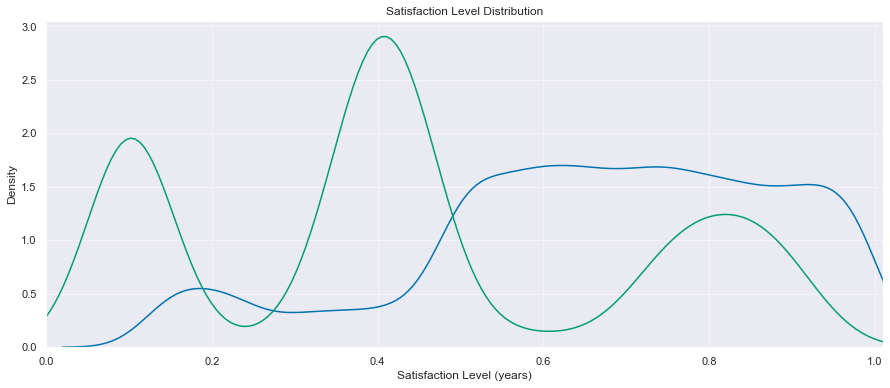

In [109]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['left'] == 0, 'satisfaction_level'], label = 'Active Employee')
sns.kdeplot(df.loc[df['left'] == 1, 'satisfaction_level'], label = 'Ex-Employees')
plt.xlim(left=0.00, right=1.01)
plt.xlabel('Satisfaction Level (years)')
plt.ylabel('Density')
plt.title('Satisfaction Level Distribution');

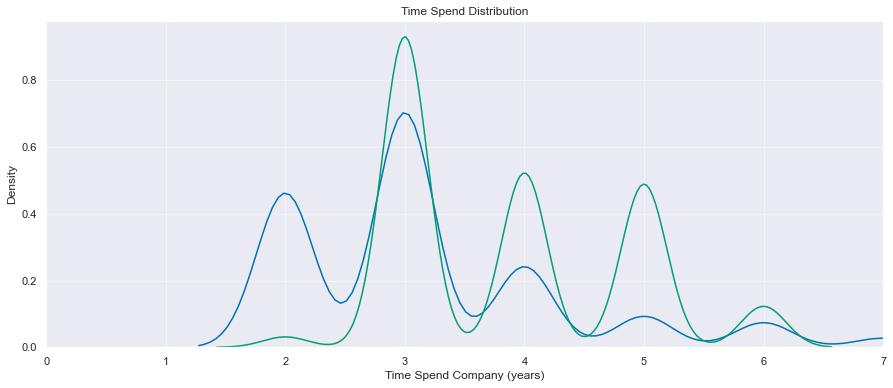

In [110]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['left'] == 0, 'time_spend_company'], label = 'Active Employee')
sns.kdeplot(df.loc[df['left'] == 1, 'time_spend_company'], label = 'Ex-Employees')
plt.xlim(left=0, right=7)
plt.xlabel('Time Spend Company (years)')
plt.ylabel('Density')
plt.title('Time Spend Distribution');

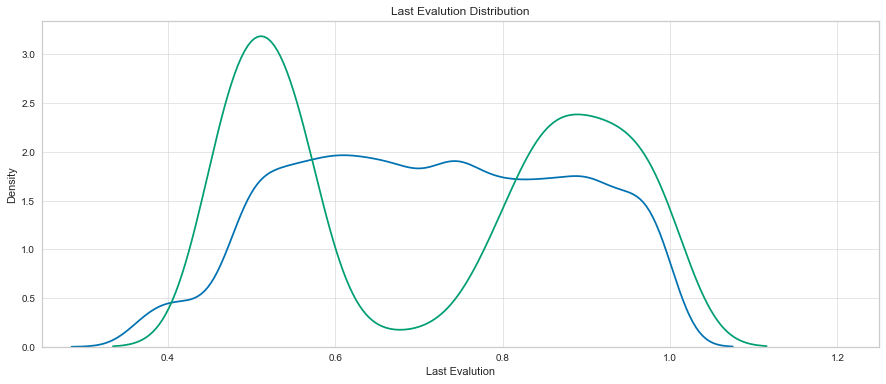

In [298]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['left'] == 0, 'last_evaluation'], label = 'Active Employee')
sns.kdeplot(df.loc[df['left'] == 1, 'last_evaluation'], label = 'Ex-Employees')
plt.xlim(left=0.25, right=1.25)
plt.xlabel('Last Evalution')
plt.ylabel('Density')
plt.title('Last Evalution Distribution');

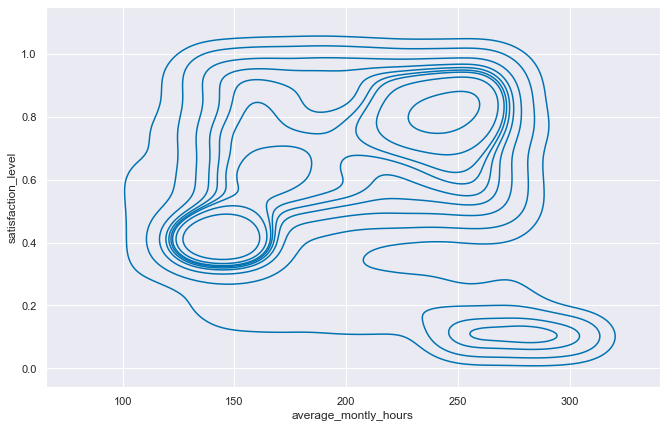

In [120]:
sns.kdeplot(data=df,x='average_montly_hours',y='satisfaction_level');

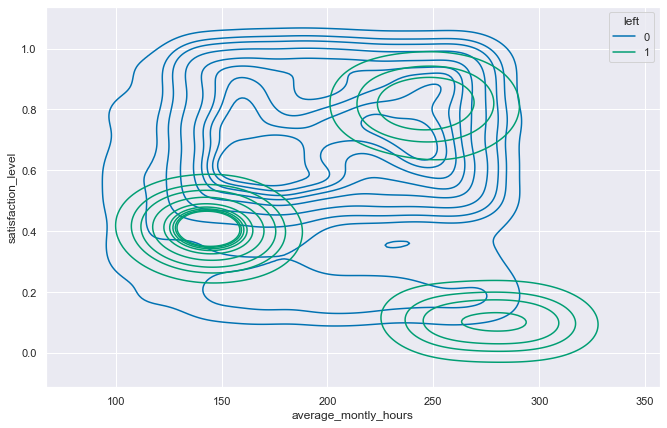

In [117]:
sns.kdeplot(data=df,x='average_montly_hours',y='satisfaction_level', hue= 'left');

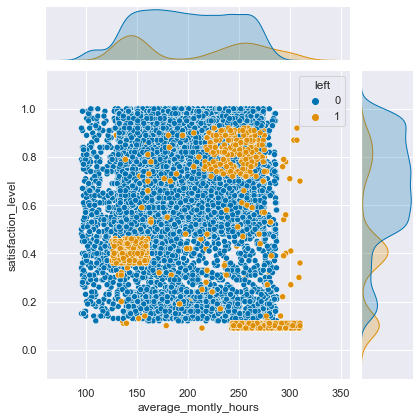

In [127]:
sns.jointplot(data=df,x='average_montly_hours',y='satisfaction_level', hue= 'left', kind='scatter', palette='colorblind');

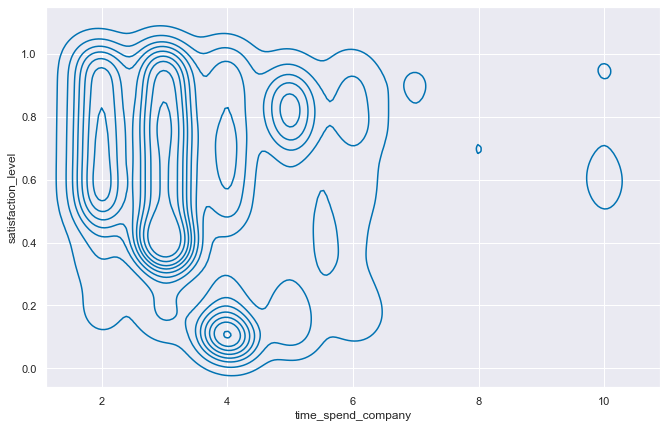

In [129]:
sns.kdeplot(data=df,x='time_spend_company',y='satisfaction_level');

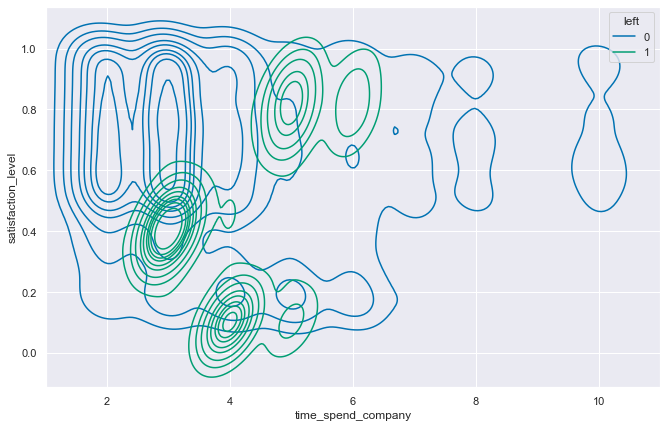

In [130]:
sns.kdeplot(data=df,x='time_spend_company',y='satisfaction_level', hue='left');

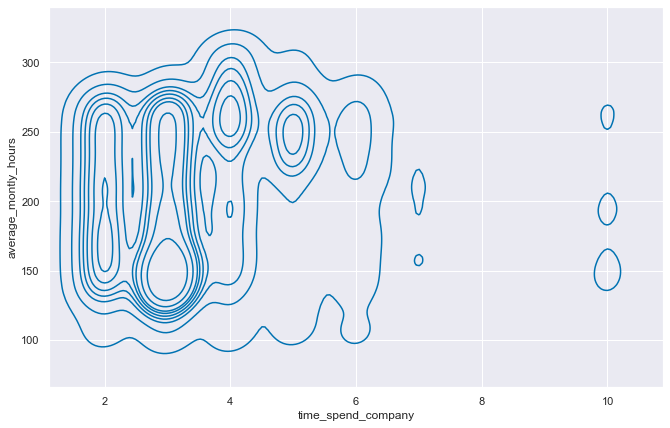

In [121]:
sns.kdeplot(data=df,x='time_spend_company',y='average_montly_hours');

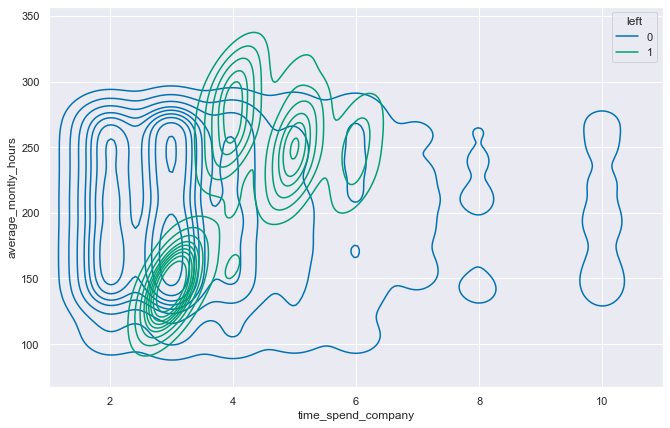

In [118]:
sns.kdeplot(data=df,x='time_spend_company',y='average_montly_hours', hue='left');

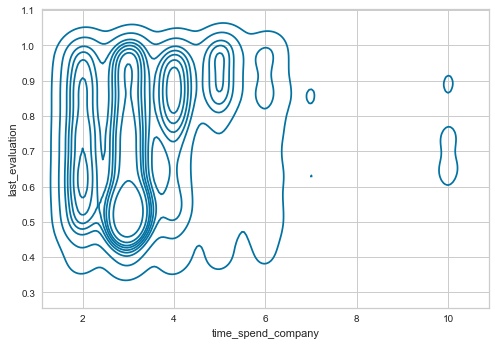

In [294]:
sns.kdeplot(data=df,x='time_spend_company',y='last_evaluation');

<Figure size 864x432 with 0 Axes>

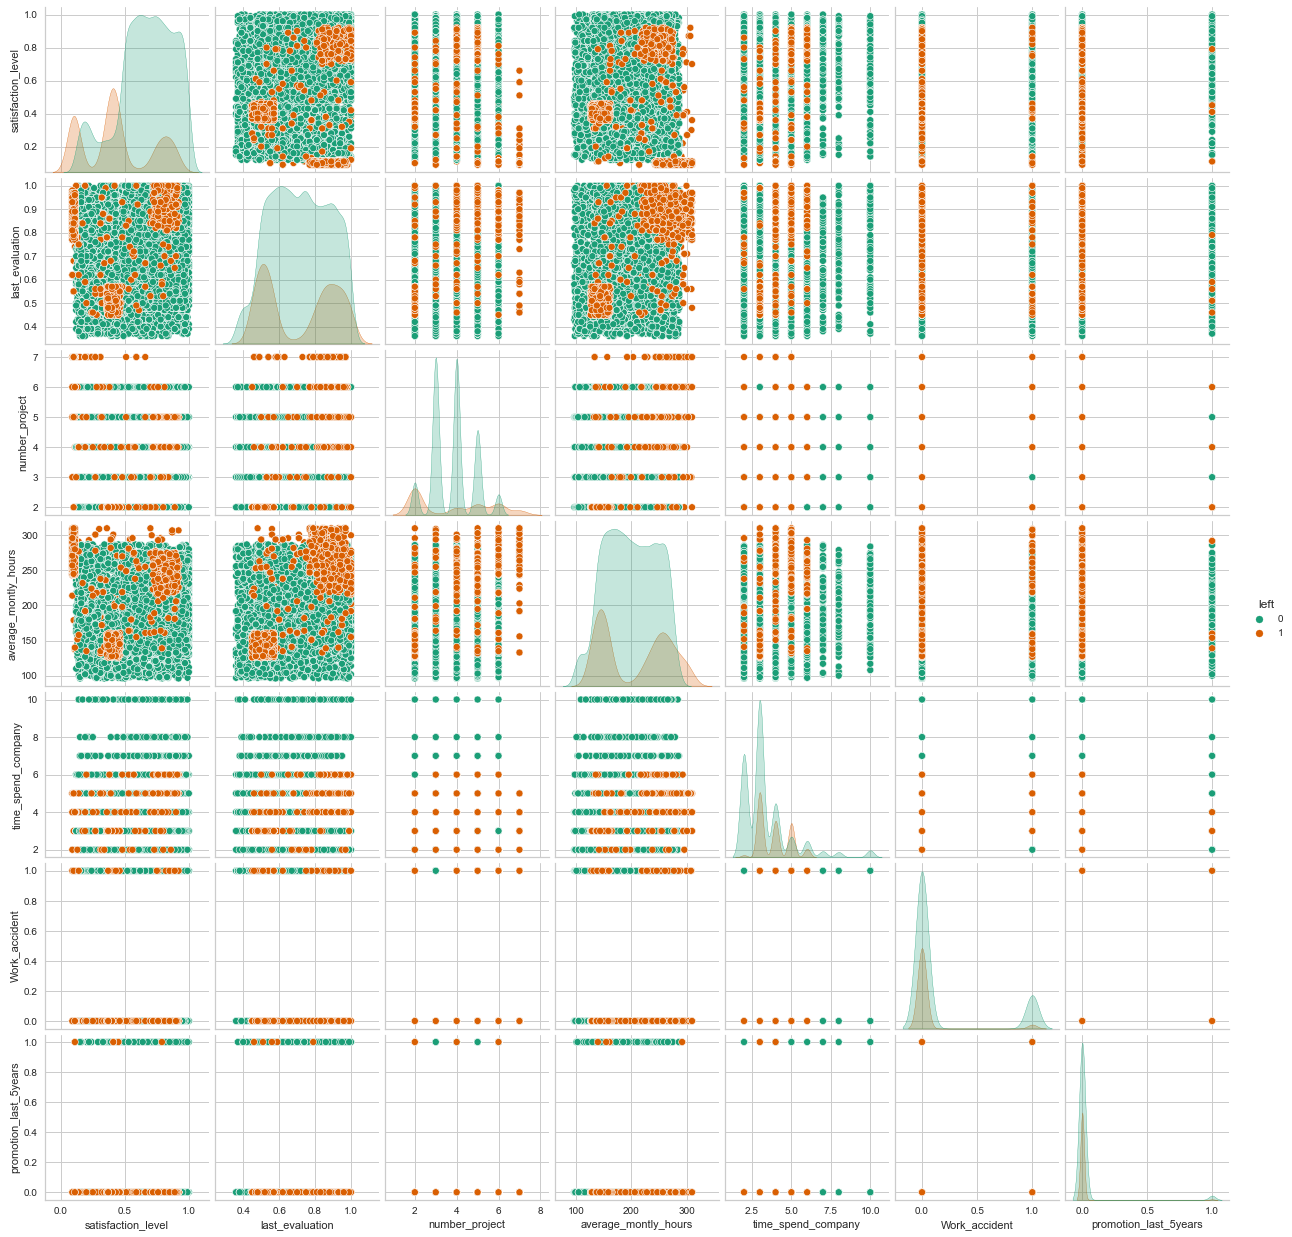

In [699]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='left',palette='Dark2')

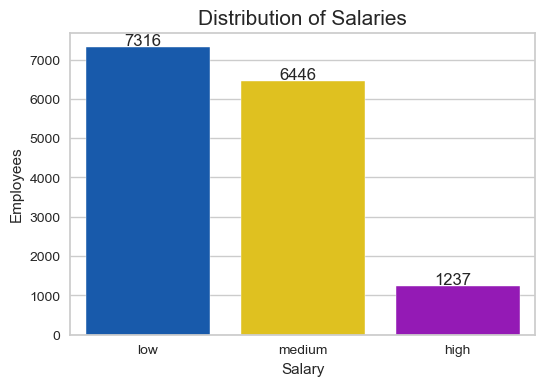

In [895]:
plt.figure(figsize=(6,4), dpi=100)
g = sns.countplot(data=df, x="salary", order=df["salary"].value_counts().index, palette="prism")
plt.title('Distribution of Salaries', fontsize = 15)
plt.xlabel("Salary")
plt.ylabel("Employees")

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+ 50));

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

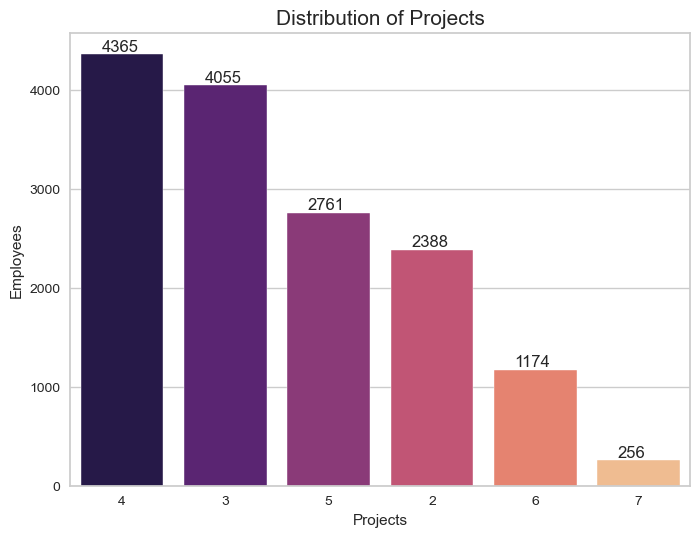

In [896]:
plt.figure(figsize=(8,6), dpi=100)
g = sns.countplot(data = df, x="number_project", order = df.number_project.value_counts().index, palette="magma")
plt.title('Distribution of Projects', fontsize = 15)
plt.xlabel("Projects")
plt.ylabel("Employees")

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+30));

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


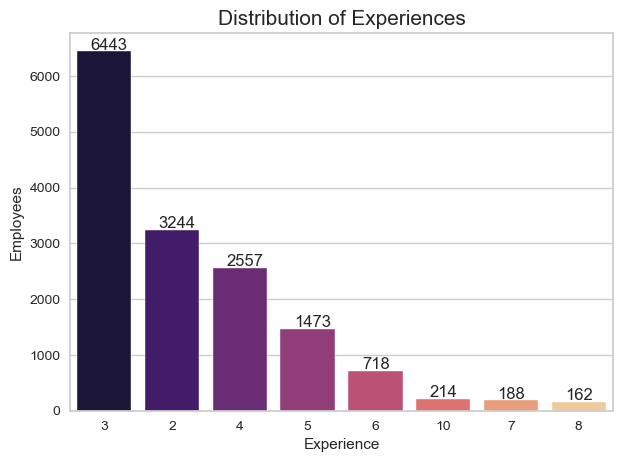

In [898]:
plt.figure(figsize=(7,5), dpi=100)
g = sns.countplot(data = df, x="time_spend_company", order = df["time_spend_company"].value_counts().index, palette="magma")
plt.title('Distribution of Experiences', fontsize = 15)
plt.xlabel("Experience")
plt.ylabel("Employees")

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+30));

### Subplots of Features

You can use the methods of the matplotlib.

In [919]:
df.rename(columns={'Departments ': 'departments'}, inplace=True)

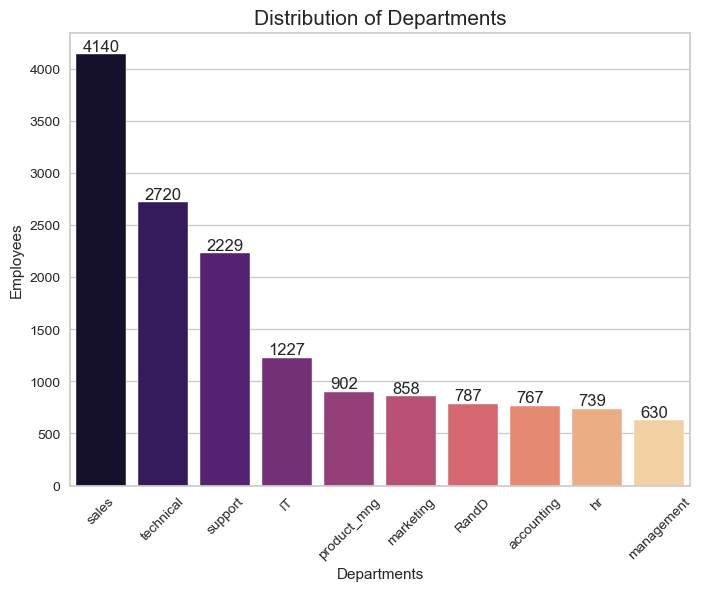

In [908]:
plt.figure(figsize=(8,6), dpi=100)
g = sns.countplot(data = df, x="departments", order = df["departments"].value_counts().index, palette="magma")
plt.title('Distribution of Departments', fontsize = 15)
plt.xlabel("Departments")
plt.ylabel("Employees")
plt.xticks(rotation=45);

for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+30));

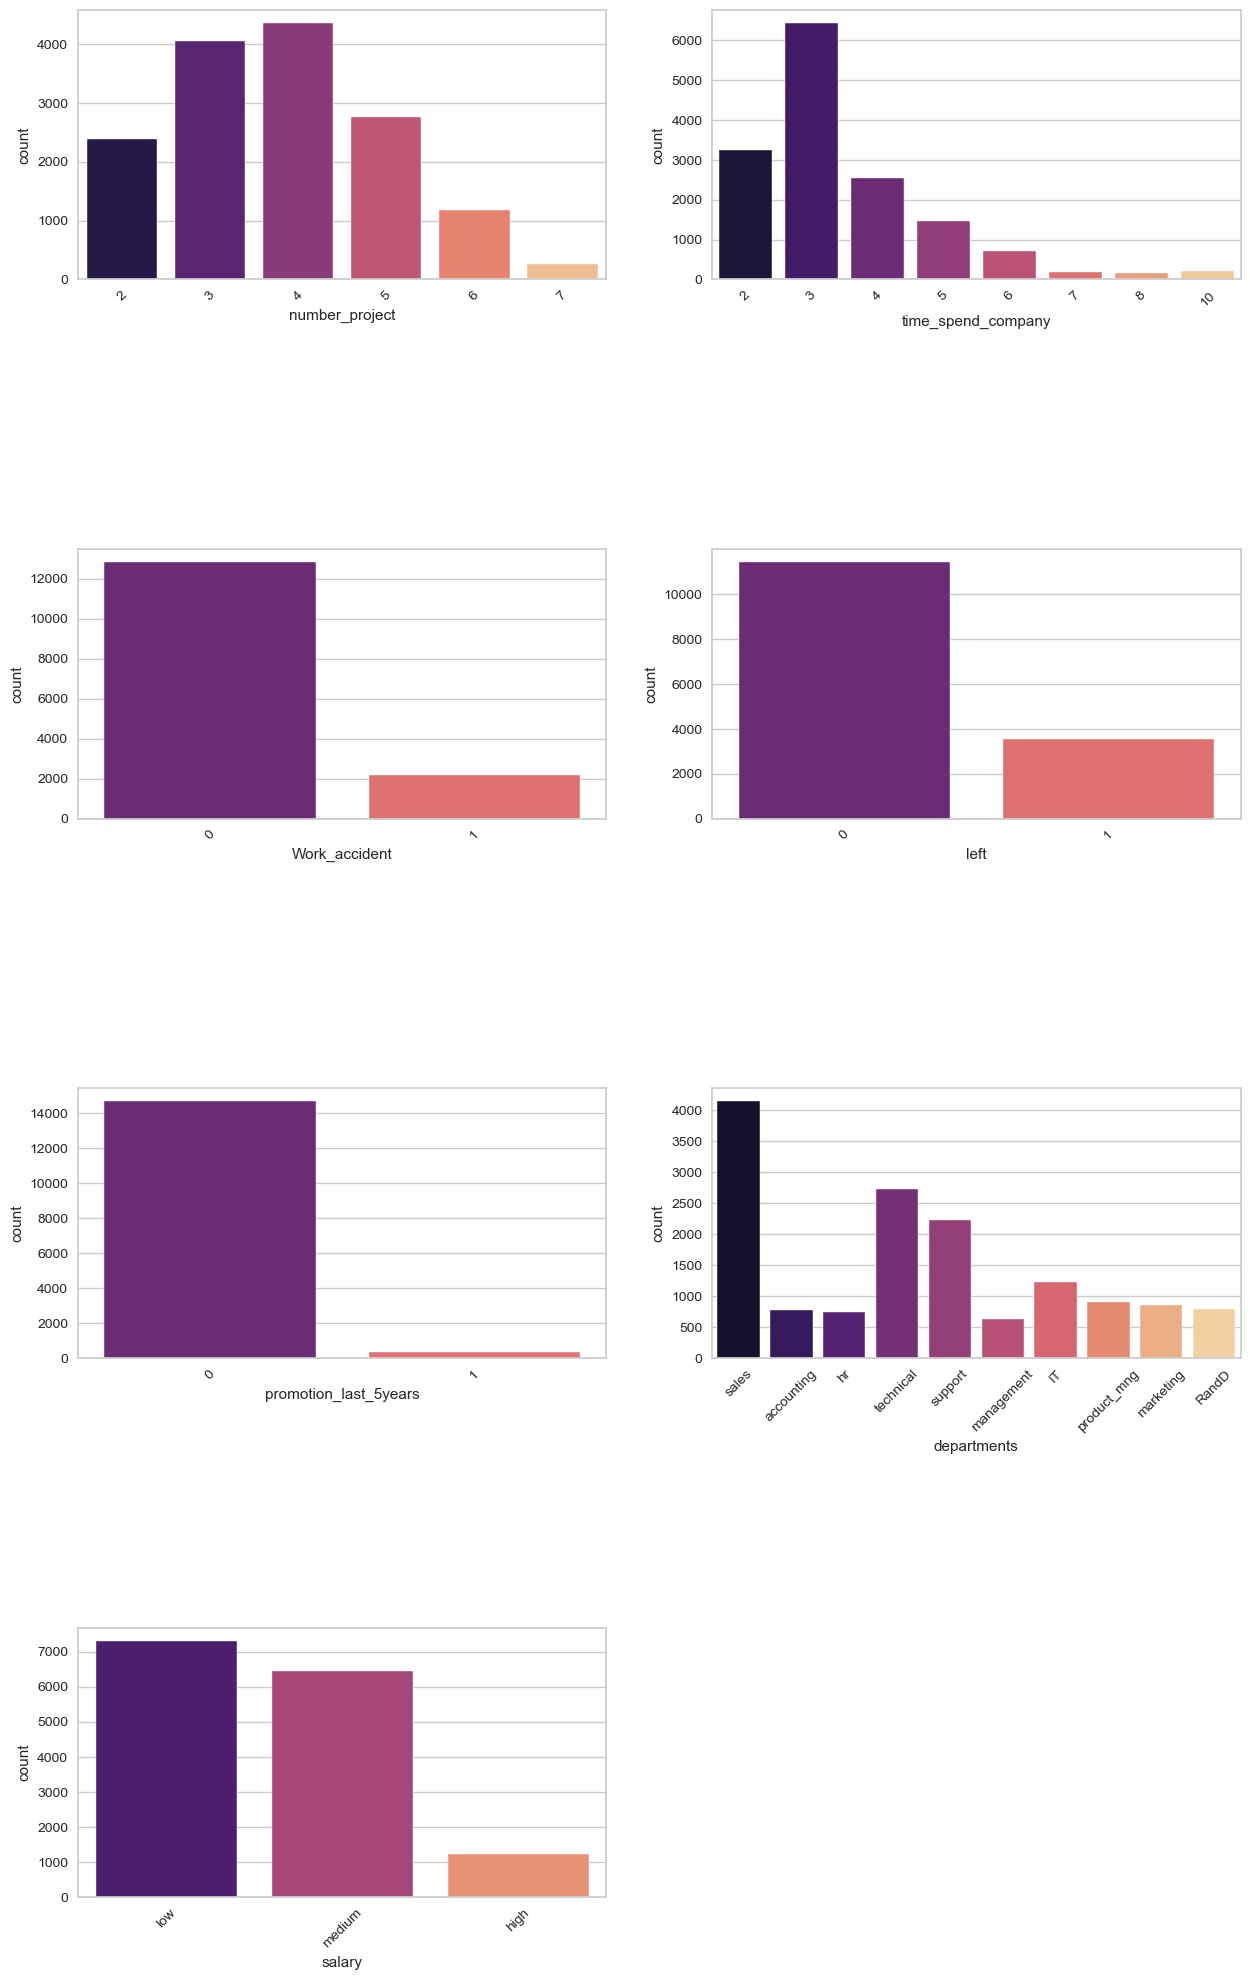

In [911]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(15,25), dpi=100)
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, palette="magma")
    plt.xticks(rotation=45)

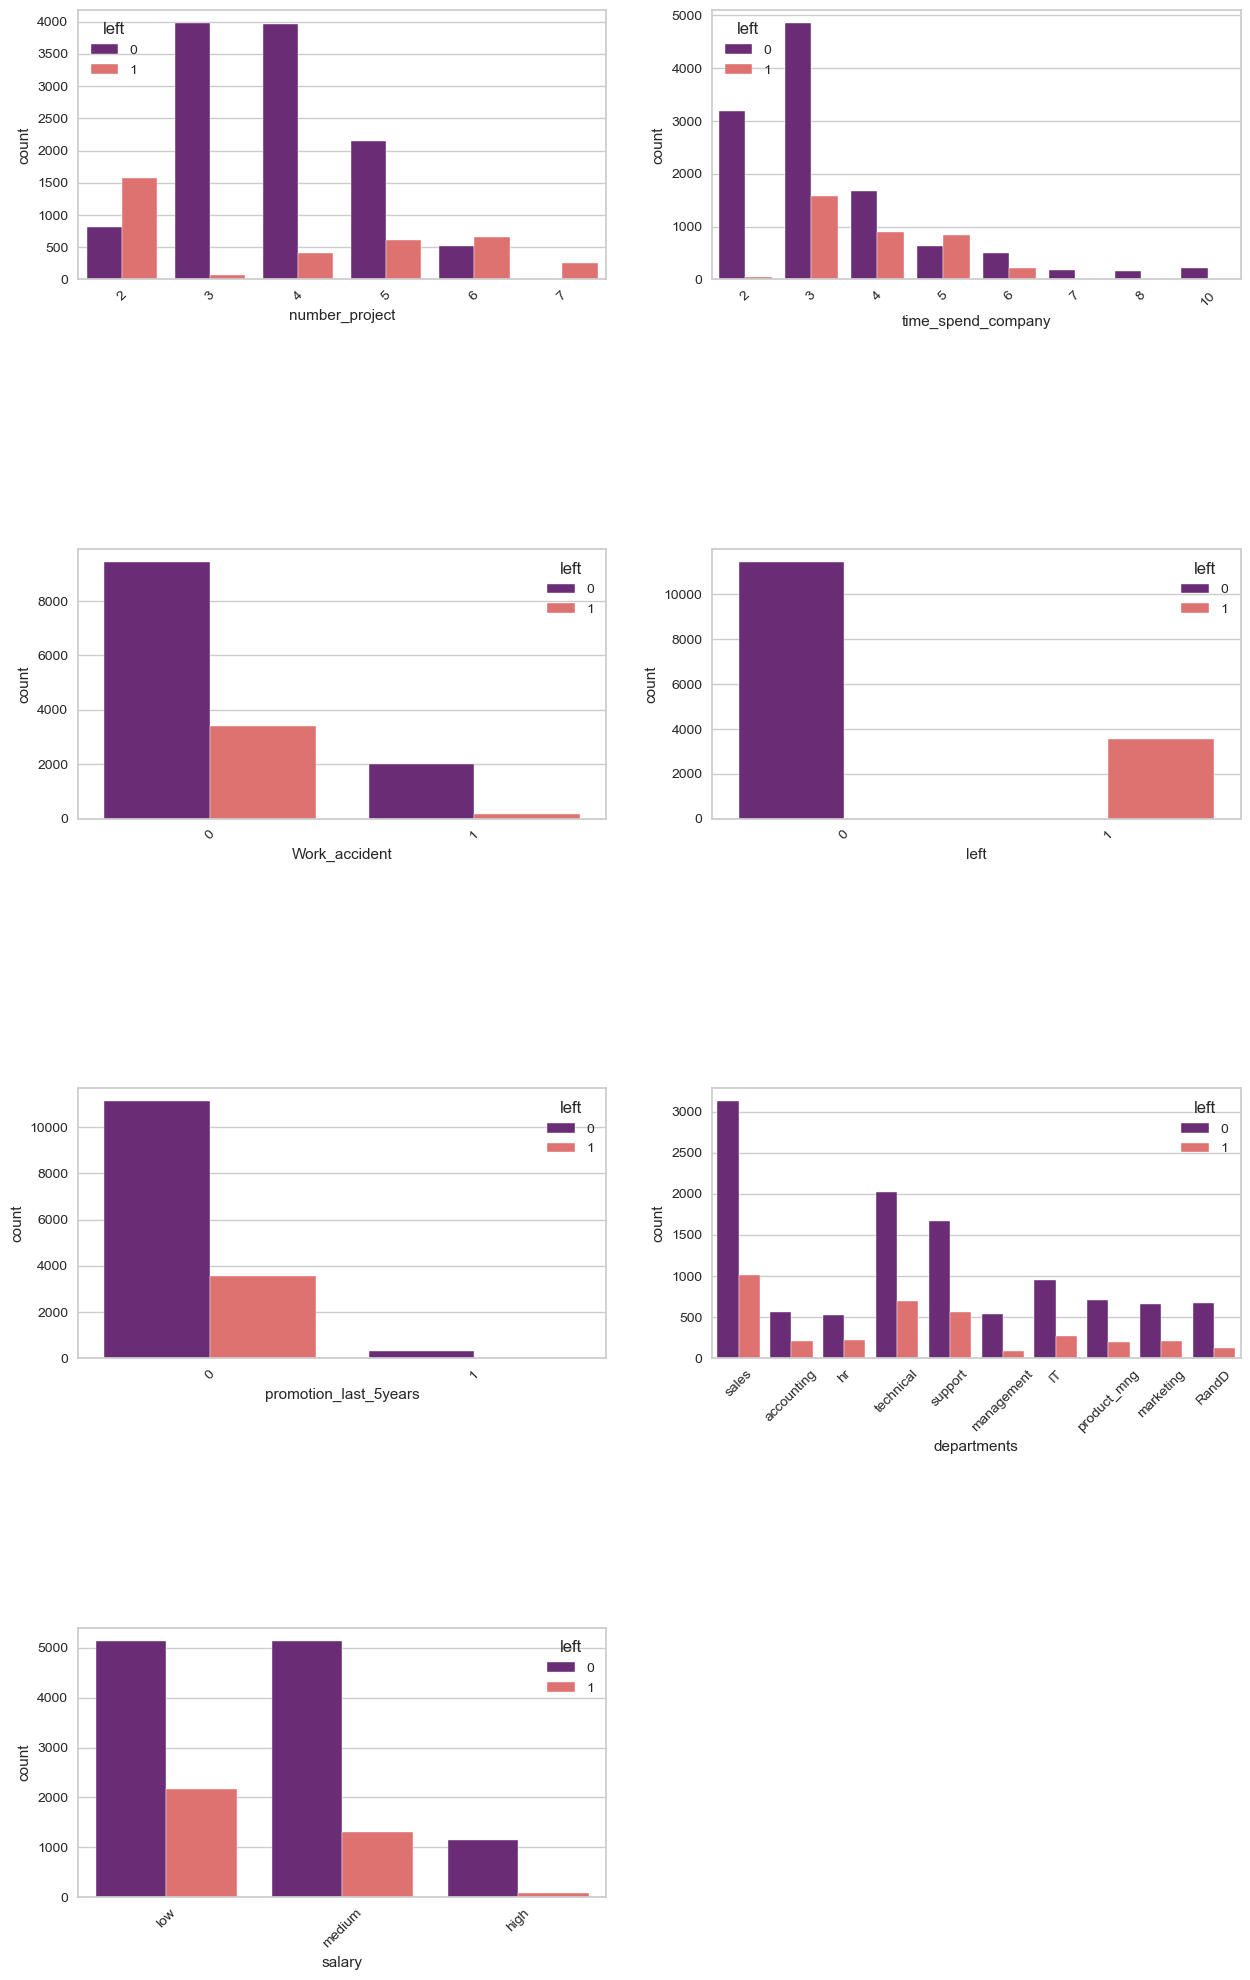

In [912]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(15,25), dpi=100)
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, hue="left", palette="magma")
    plt.xticks(rotation=45)

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [827]:
from sklearn.preprocessing import StandardScaler

In [920]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [404]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [830]:
X = df.drop("left",axis=1)

In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Departments            14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [913]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [914]:
labelencoder = LabelEncoder()

In [915]:
X = df.drop("left",axis=1)

In [916]:
X['salary'] = labelencoder.fit_transform(X['salary'])

In [917]:
X['departments'] = labelencoder.fit_transform(X['departments'])

In [918]:
X.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
3356,0.60,0.60,3,221,2,0,0,1,2
5088,0.61,0.95,4,169,4,0,0,8,2
8314,0.55,0.47,3,194,2,0,0,0,0
12087,0.44,0.45,2,132,3,0,0,7,1
4353,0.72,0.74,3,187,2,0,0,7,2
14679,0.90,0.92,5,245,5,0,0,7,1
3855,0.70,0.56,5,208,3,0,0,9,2
9802,0.84,0.56,3,266,3,0,0,3,0
11953,0.48,0.72,3,143,4,0,0,7,2
3766,0.44,0.74,5,253,2,0,0,2,2


Get Dummies can be used instead of Label Encoding.

In [331]:
#df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2}).astype(int)

In [332]:
#df = pd.get_dummies(df, columns=['Departments'])

#### Hopkins Test

In [201]:
from pyclustertend import hopkins

0.22637777813243987

In [ ]:
hopkins(X, X.shape[0])

In [202]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [203]:
X_scaled

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.14741182,
         0.39372503, -0.55495458],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.14741182,
         0.39372503,  1.04300352],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.14741182,
         0.39372503,  1.04300352],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.14741182,
         0.74231612, -0.55495458],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.14741182,
         0.74231612, -0.55495458],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.14741182,
         0.74231612, -0.55495458]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

## Elbow Method

In [ ]:
from sklearn.cluster import KMeans

In [205]:
ssd = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(X_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

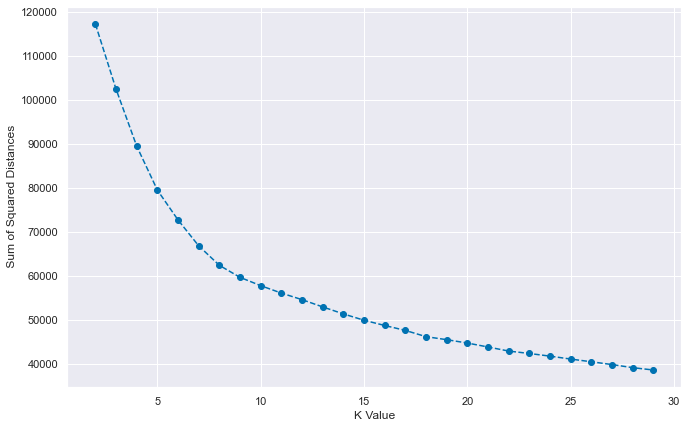

In [186]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

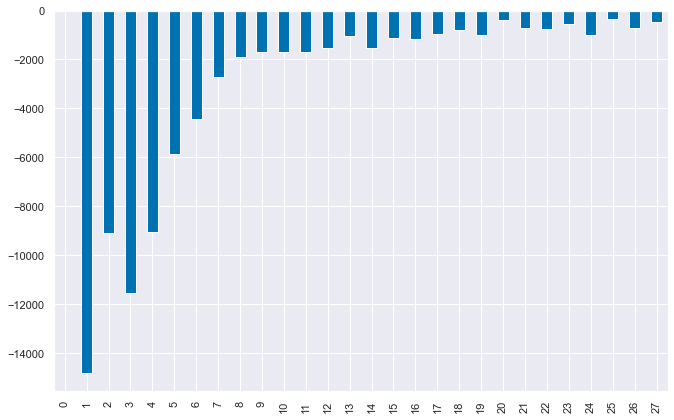

In [206]:
pd.Series(ssd).diff().plot(kind='bar');

In [207]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,14805.533356
3,9108.253579
4,11553.685634
5,9052.533685
6,5881.536358
7,4422.822814
8,2732.254917
9,1881.927218
10,1676.660428


<AxesSubplot:>

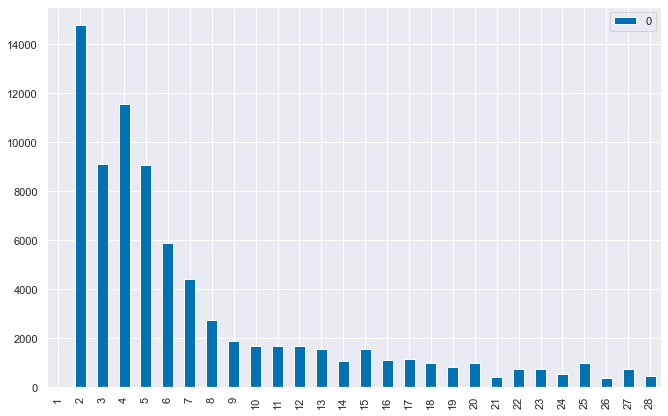

In [208]:
df_diff.plot(kind='bar')

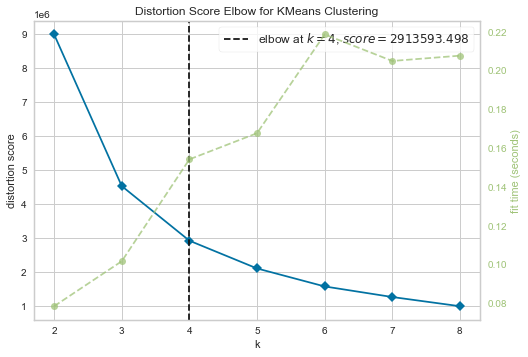

In [209]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [210]:
from sklearn.metrics import silhouette_score

In [212]:
K_means_model = KMeans(n_clusters=10, random_state=42)

In [213]:
K_means_model.fit(X)

KMeans(n_clusters=10, random_state=42)

In [214]:
K_means_model.labels_

array([5, 9, 9, ..., 2, 9, 5])

In [215]:
X["Classes"] = K_means_model.labels_

In [216]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Classes
0,0.38,0.53,2,157,3,0,0,7,1,5
1,0.80,0.86,5,262,6,0,0,7,2,9
2,0.11,0.88,7,272,4,0,0,7,2,9
3,0.72,0.87,5,223,5,0,0,7,1,4
4,0.37,0.52,2,159,3,0,0,7,1,5
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,5
14995,0.37,0.48,2,160,3,0,0,8,1,5
14996,0.37,0.53,2,143,3,0,0,8,1,2
14997,0.11,0.96,6,280,4,0,0,8,1,9


In [217]:
silhouette_score(X, K_means_model.labels_)

0.48149954668421685

In [218]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6374153895003692
For n_clusters=3, the silhouette score is 0.5663420125870544
For n_clusters=4, the silhouette score is 0.5168609866234795
For n_clusters=5, the silhouette score is 0.4766478609530811
For n_clusters=6, the silhouette score is 0.4693290092784002
For n_clusters=7, the silhouette score is 0.47121816492303953
For n_clusters=8, the silhouette score is 0.46467513933128063


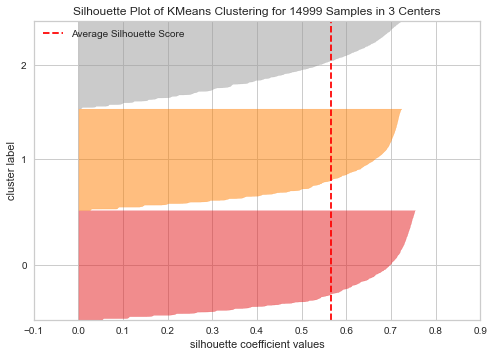

In [219]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [838]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['left']

In [839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNeighbors Classifier

#### Model Building

In [840]:
from sklearn.neighbors import KNeighborsClassifier

In [841]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KNN model is based on distance. We should apply Scale.

In [824]:
scaler = StandardScaler()

In [842]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Elbow Method 

Critical Point is k value for KNN model. We should choose optimum k value for the best score. 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [625]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

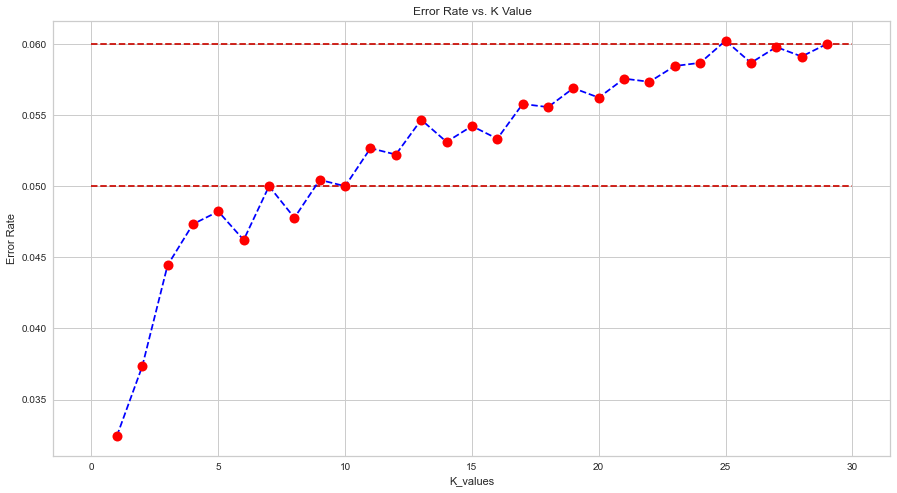

In [626]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

#### Various K Values

In [627]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[3336   92]
 [  54 1018]]


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3428
           1       0.92      0.95      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [628]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=10


[[3327  101]
 [ 124  948]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3428
           1       0.90      0.88      0.89      1072

    accuracy                           0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500



#### Cross Validate For Optimal K Value 

In [458]:
from sklearn.model_selection import cross_val_score, cross_validate

In [629]:
model = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 15)
df_scores = pd.DataFrame(scores, index = range(1, 16))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.083368,0.077881,0.944286,0.876471,0.892216,0.884273
2,0.062144,0.059111,0.964286,0.927711,0.922156,0.924925
3,0.061986,0.049842,0.962857,0.932515,0.910180,0.921212
4,0.069780,0.051828,0.957143,0.905325,0.916168,0.910714
5,0.061795,0.051339,0.958571,0.920732,0.904192,0.912387
6,0.061793,0.053992,0.961429,0.916667,0.922156,0.919403
7,0.068856,0.061129,0.954286,0.881356,0.934132,0.906977
8,0.062790,0.059934,0.958571,0.905882,0.922156,0.913947
9,0.071397,0.053872,0.954286,0.885714,0.928144,0.906433
10,0.061682,0.066453,0.964286,0.922156,0.927711,0.924925


#### Gridsearch Method for Choosing Reasonable K Value

In [630]:
from sklearn.model_selection import GridSearchCV

In [631]:
knn_grid = KNeighborsClassifier()

In [632]:
k_values= range(1,30)

In [633]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform',"distance"]}

In [634]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [635]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [528]:
knn_grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [636]:
knn = KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=6


[[3327  101]
 [  48 1024]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3428
           1       0.91      0.96      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Evaluating Model Performance

#### Evaluating ROC Curves and AUC 

In [380]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

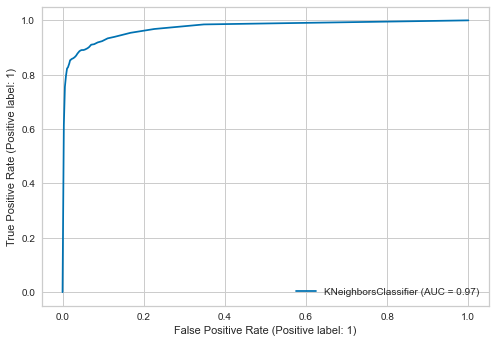

In [638]:
plot_roc_curve(knn_model, scaled_X_test, y_test);

#### Confusion Matrix

In [733]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [734]:
confusion_matrix(y_test, pred)

array([[3327,  101],
       [  48, 1024]], dtype=int64)

#### Final Model

In [921]:
import pickle

In [654]:
scaler = StandardScaler()

In [655]:
scaler.fit(X)

StandardScaler()

In [656]:
X_scaled = scaler.transform(X)

In [657]:
final_knn_model = KNeighborsClassifier(n_neighbors=6)

In [658]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [659]:
pickle.dump(scaler, open('scaler_knn.pkl', 'wb'))

In [660]:
loaded_scaler = pickle.load(open('scaler_knn.pkl', 'rb'))

In [661]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [662]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


#### Predict New Observations

In [663]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [673]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
Departments,14999.0,5.870525,2.868786,0.00,4.00,7.00,8.00,9.0
salary,14999.0,1.347290,0.625819,0.00,1.00,1.00,2.00,2.0


In [881]:
new_obs = {"satisfaction_level": [0.5, 0.15, 0.65, 0.77, 0.21, 1], "last_evaluation": [0.47, 0.79, 0.85, 0.63, 0.27, 1],
           "number_project":[ 4, 3, 5, 3, 4, 7], 'average_montly_hours':[ 229, 161, 175, 255, 269, 310], 
           'time_spend_company':[ 2, 2, 3, 6, 4, 10],'Work_accident':[ 0, 0, 1, 0, 0, 1], 'promotion_last_5years':[ 0, 0, 0, 0, 0, 1], 
           'Departments':[ 7, 6, 1, 2, 4, 9], 'salary':[ 1, 2, 2, 1, 0, 2]}

In [675]:
samples = pd.DataFrame(new_obs)
samples

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.50,0.47,4,229,2,0,0,7,1
1,0.15,0.79,3,161,2,0,0,6,2
2,0.65,0.85,5,175,3,1,0,1,2
3,0.77,0.63,3,255,6,0,0,2,1
4,0.21,0.27,4,269,4,0,0,4,0
5,1.00,1.00,7,310,10,1,1,9,2


In [676]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-0.45383497, -1.43781751,  0.15978764,  0.55964879, -1.0261256 ,
        -0.41116529, -0.14741182,  0.39372503, -0.55495458],
       [-1.86159249,  0.431741  , -0.65153764, -0.80194606, -1.0261256 ,
        -0.41116529, -0.14741182,  0.04513394,  1.04300352],
       [ 0.14948968,  0.78228322,  0.97111292, -0.52161771, -0.34123516,
         2.4321119 , -0.14741182, -1.69782153,  1.04300352],
       [ 0.6321494 , -0.50303825, -0.65153764,  1.08025858,  1.71343614,
        -0.41116529, -0.14741182, -1.34923044, -0.55495458],
       [-1.62026263, -2.60629158,  0.15978764,  1.36058694,  0.34365527,
        -0.41116529, -0.14741182, -0.65204825, -2.15291269],
       [ 1.5572472 ,  1.65863878,  2.59376348,  2.18154854,  4.45299788,
         2.4321119 ,  6.78371644,  1.09090722,  1.04300352]])

In [677]:
loaded_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=6)

In [678]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [679]:
samples["pred"] = predictions
samples["pred_proba"] = predictions_proba[:,1]
samples

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,pred,pred_proba
0,0.50,0.47,4,229,2,0,0,7,1,0,0.000000
1,0.15,0.79,3,161,2,0,0,6,2,0,0.000000
2,0.65,0.85,5,175,3,1,0,1,2,0,0.000000
3,0.77,0.63,3,255,6,0,0,2,1,0,0.000000
4,0.21,0.27,4,269,4,0,0,4,0,0,0.000000
5,1.00,1.00,7,310,10,1,1,9,2,0,0.166667


### Model Building

### GradientBoosting Model

In [740]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [741]:
model = GradientBoostingClassifier(random_state=42)

In [742]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [743]:
y_pred = model.predict(X_test)

In [744]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[3385   43]
 [  85  987]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [745]:
model.feature_importances_

array([5.53257413e-01, 1.00288376e-01, 1.05485774e-01, 6.88434136e-02,
       1.69688919e-01, 1.04536883e-03, 0.00000000e+00, 3.80597144e-04,
       1.01013800e-03])

In [746]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
feats

,Importance
satisfaction_level,0.553257
last_evaluation,0.100288
number_project,0.105486
average_montly_hours,0.068843
time_spend_company,0.169689
Work_accident,0.001045
promotion_last_5years,0.000000
Departments,0.000381
salary,0.001010


In [747]:
imp_feats = feats.sort_values("Importance")

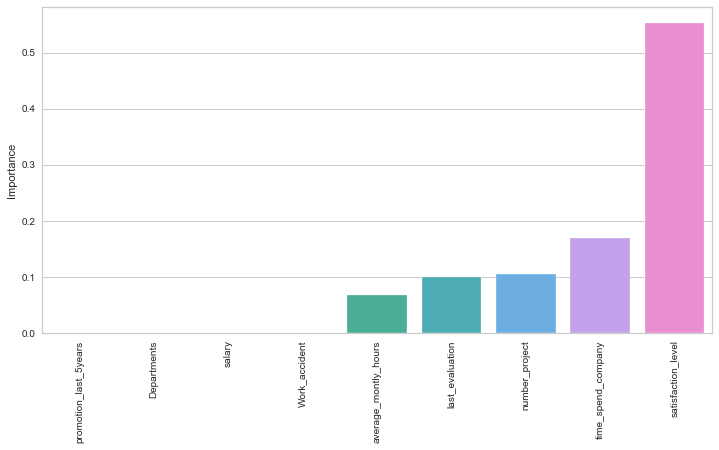

In [748]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

### Gridsearch Method

In [845]:
from sklearn.model_selection import GridSearchCV

In [846]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [847]:
model = GradientBoostingClassifier(random_state=42)

In [848]:
grid = GridSearchCV(model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [849]:
grid.best_estimator_

GradientBoostingClassifier(n_estimators=300, random_state=42, subsample=1)

In [850]:
y_pred = grid.predict(X_test)

In [851]:
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)
gb_acc = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[3392   36]
 [  76  996]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.97      0.93      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.97      0.98      0.97      4500



### Evaluating Model Performance

### ROC Curves and AUC

In [756]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

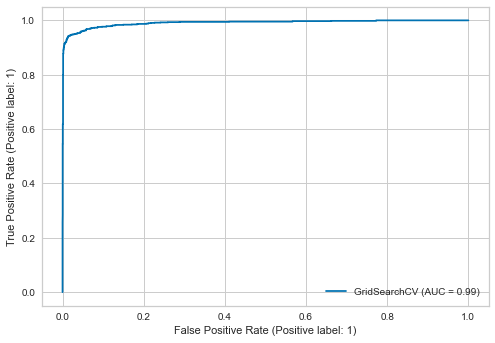

In [757]:
plot_roc_curve(grid, X_test, y_test);

### Confusion Matrix & Yellow Blick

In [806]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [807]:
confusion_matrix(y_test, y_pred)

array([[3392,   36],
       [  76,  996]], dtype=int64)

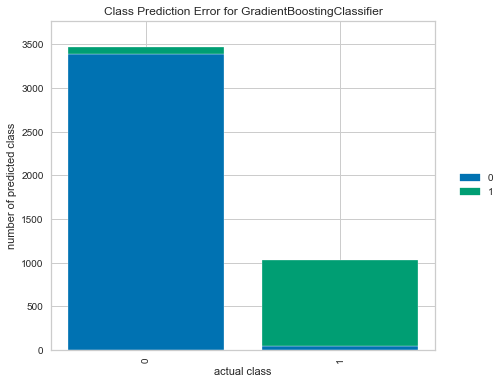

In [763]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

### Cross Validate

In [765]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [766]:
model = GradientBoostingClassifier(max_depth=None, random_state=42)

In [767]:
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
1,4.498371,0.014689,0.986667,0.980368,0.983000,0.981675
2,3.959648,0.011957,0.982857,0.978932,0.973625,0.976244
3,4.120355,0.017893,0.980952,0.976277,0.971000,0.973604
4,4.000359,0.012957,0.980000,0.974309,0.970375,0.972323
5,4.290893,0.021929,0.959048,0.934697,0.956625,0.944975
6,4.491965,0.012151,0.980952,0.969080,0.979250,0.974034
7,4.275599,0.012184,0.977143,0.966160,0.971250,0.968672
8,4.086751,0.012957,0.982857,0.972784,0.980500,0.976567
9,4.102059,0.015011,0.984762,0.981586,0.976250,0.978883
10,4.204846,0.014892,0.985701,0.977170,0.983710,0.980387


In [768]:
df_scores.mean()[2:]

test_accuracy           0.980094
test_precision_macro    0.971136
test_recall_macro       0.974558
test_f1_macro           0.972736
dtype: float64

### Random Forest Model

In [781]:
from sklearn.ensemble import RandomForestClassifier

#### Evaluating Model Performance

In [782]:
rf_model = RandomForestClassifier(random_state=101)

In [783]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [784]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3392   36]
 [  76  996]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.97      0.93      0.95      1072

    accuracy                           0.98      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.97      0.98      0.97      4500



In [785]:
rf_model.feature_importances_

array([0.31221322, 0.12478476, 0.19832041, 0.1506389 , 0.18697846,
       0.0057166 , 0.00088019, 0.01207007, 0.00839741])

In [786]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.312213
number_project,0.198320
time_spend_company,0.186978
average_montly_hours,0.150639
last_evaluation,0.124785
Departments,0.012070
salary,0.008397
Work_accident,0.005717
promotion_last_5years,0.000880


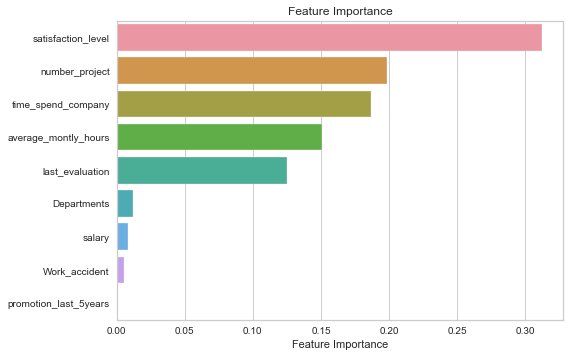

In [684]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

#### Choosing correct number of trees

In [813]:
from sklearn.metrics import accuracy_score

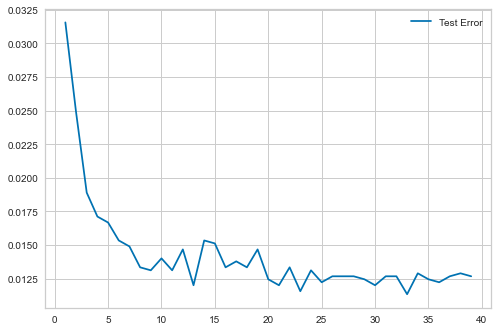

In [814]:
test_error = []
for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n, max_features='auto')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
plt.plot(range(1,40), test_error, label='Test Error')
plt.legend()

#### Final Model of Random Forest

In [922]:
final_rf_model = RandomForestClassifier(random_state=101)

In [923]:
scaler = StandardScaler()

In [924]:
scaler.fit(X)

StandardScaler()

In [925]:
pickle.dump(final_rf_model, open('rf_final.pkl', 'wb'))

In [926]:
pickle.dump(scaler, open('scaler_rf.pkl', 'wb'))

In [927]:
loaded_scaler = pickle.load(open('scaler_rf.pkl', 'rb'))

In [928]:
loaded_model = pickle.load(open('rf_final.pkl', 'rb'))

#### Predict New Observations

In [787]:
new_obsrf = {"satisfaction_level": [0.5, 0.15, 0.65, 0.77, 0.21, 1, 0], "last_evaluation": [0.47, 0.79, 0.85, 0.63, 0.27, 1, 0],
           "number_project":[ 4, 3, 5, 3, 4, 7,3], 'average_montly_hours':[ 229, 161, 175, 255, 269, 310,150], 
           'time_spend_company':[ 2, 2, 3, 6, 4, 10,3],'Work_accident':[ 0, 0, 1, 0, 0,1,0], 'promotion_last_5years':[ 0,0,0,0,0,1,0], 
           'Departments':[ 7, 6, 1, 2, 4, 9, 3], 'salary':[ 1, 2, 2, 1, 0, 2, 2]}

In [810]:
samplesrf = pd.DataFrame(new_obsrf)
samplesrf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.50,0.47,4,229,2,0,0,7,1
1,0.15,0.79,3,161,2,0,0,6,2
2,0.65,0.85,5,175,3,1,0,1,2
3,0.77,0.63,3,255,6,0,0,2,1
4,0.21,0.27,4,269,4,0,0,4,0
5,1.00,1.00,7,310,10,1,1,9,2
6,0.00,0.00,3,150,3,0,0,3,2


In [873]:
samplesrf.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,7.0,0.468571,0.364025,0.0,0.18,0.50,0.71,1.0
last_evaluation,7.0,0.572857,0.351222,0.0,0.37,0.63,0.82,1.0
number_project,7.0,4.142857,1.463850,3.0,3.00,4.00,4.50,7.0
average_montly_hours,7.0,221.285714,60.829582,150.0,168.00,229.00,262.00,310.0
time_spend_company,7.0,4.285714,2.870208,2.0,2.50,3.00,5.00,10.0
Work_accident,7.0,0.285714,0.487950,0.0,0.00,0.00,0.50,1.0
promotion_last_5years,7.0,0.142857,0.377964,0.0,0.00,0.00,0.00,1.0
Departments,7.0,4.571429,2.878492,1.0,2.50,4.00,6.50,9.0
salary,7.0,1.428571,0.786796,0.0,1.00,2.00,2.00,2.0


In [811]:
samplesr_scaled = loaded_scaler.transform(samplesrf)
samplesr_scaled

array([[-0.45383497, -1.43781751,  0.15978764,  0.55964879, -1.0261256 ,
        -0.41116529, -0.14741182,  0.39372503, -0.55495458],
       [-1.86159249,  0.431741  , -0.65153764, -0.80194606, -1.0261256 ,
        -0.41116529, -0.14741182,  0.04513394,  1.04300352],
       [ 0.14948968,  0.78228322,  0.97111292, -0.52161771, -0.34123516,
         2.4321119 , -0.14741182, -1.69782153,  1.04300352],
       [ 0.6321494 , -0.50303825, -0.65153764,  1.08025858,  1.71343614,
        -0.41116529, -0.14741182, -1.34923044, -0.55495458],
       [-1.62026263, -2.60629158,  0.15978764,  1.36058694,  0.34365527,
        -0.41116529, -0.14741182, -0.65204825, -2.15291269],
       [ 1.5572472 ,  1.65863878,  2.59376348,  2.18154854,  4.45299788,
         2.4321119 ,  6.78371644,  1.09090722,  1.04300352],
       [-2.46491714, -4.18373158, -0.65153764, -1.02220405, -0.34123516,
        -0.41116529, -0.14741182, -1.00063934,  1.04300352]])

In [795]:
loaded_model.fit(X_scaled,y)

RandomForestClassifier(random_state=101)

In [796]:
predictions = loaded_model.predict(samplesr_scaled)
predictions_proba = loaded_model.predict_proba(samplesr_scaled)

In [797]:
samplesrf["pred"] = predictions
samplesrf["pred_proba"] = predictions_proba[:,1]
samplesrf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,pred,pred_proba
0,0.50,0.47,4,229,2,0,0,7,1,0,0.03
1,0.15,0.79,3,161,2,0,0,6,2,0,0.05
2,0.65,0.85,5,175,3,1,0,1,2,0,0.01
3,0.77,0.63,3,255,6,0,0,2,1,0,0.03
4,0.21,0.27,4,269,4,0,0,4,0,0,0.02
5,1.00,1.00,7,310,10,1,1,9,2,0,0.39
6,0.00,0.00,3,150,3,0,0,3,2,1,0.66


### Model Comparing 

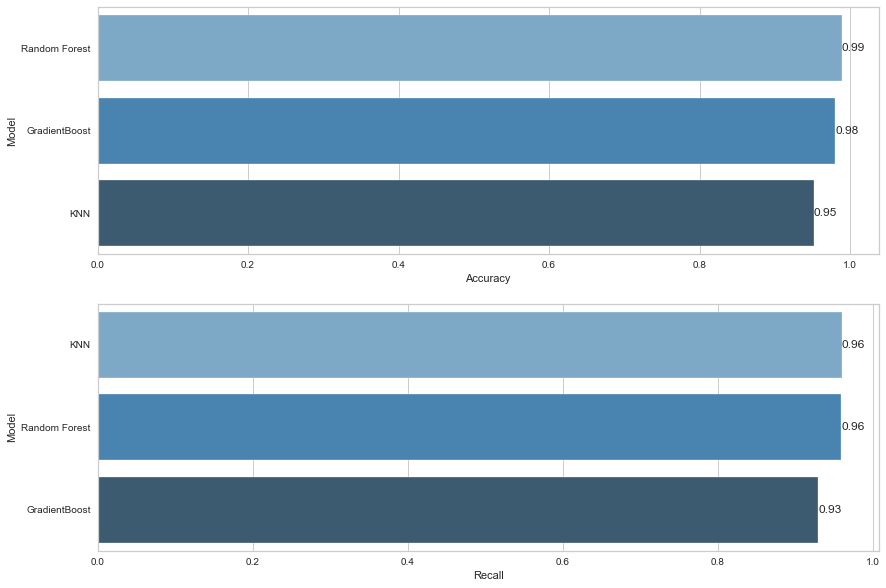

In [868]:
compare = pd.DataFrame({"Model": ["KNN", "Random Forest", "GradientBoost"],
                        "Accuracy": [knn_acc, rf_acc, gb_acc],
                        "Recall": [knn_recall, rf_recall, gb_recall]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___